# Money Management and Financial Literacy
https://catalog.data.gov/dataset/money-management-and-financial-literacy

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv("Money_Management_and_Financial_Literacy.csv")

df_clean = df.drop(columns=[
    'X', 'Y', 'MAR_MATCHADDRESS', 'MAR_XCOORD', 'MAR_YCOORD',
    'MAR_ERROR', 'MAR_IGNORE', 'MAR_SOURCEOPERATION'
])


df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')

print(df_clean.info)
display(df_clean.head())
df_clean.to_csv('Money_Management_and_Financial_Literacy_clean.csv', index=False)



<bound method DataFrame.info of    objectid          categories_of_service  \
0     14087  Bill Pay and Money Management   
1     14088    Planning for Long Term Care   
2     14089    Planning for Long Term Care   

                                        organization  \
0  East River Family Strengthening Collaborative ...   
1      Seabury Resources for Aging - Care Management   
2  Terrific, Inc. Regional Senior Services – Case...   

                                 full_address  \
0    Minnesota Avenue NE Washington, DC 20019   
1  6031 Kansas Avenue NW Washington, DC 20011   
2       1222 T Street NW Washington, DC 20009   

                                           website                      email  \
0                            https://www.erfsc.org         rpeoples@erfsc.org   
1  https://www.seaburyresources.org/caremanagement  info@seaburyresources.org   
2      https://www.terrificinc.org/senior-services       info@terrificinc.org   

           phone                    

,objectid,categories_of_service,organization,full_address,website,email,phone,service_available_to,additional_services_mayinclude,description_of_service,zipcode,mar_latitude,mar_longitude,mar_ward,mar_census_tract,mar_zipcode,marid,mar_score
0,14087,Bill Pay and Money Management,East River Family Strengthening Collaborative ...,"Minnesota Avenue NE Washington, DC 20019",https://www.erfsc.org,rpeoples@erfsc.org,202-397-7300,Services may Include: Bill Pay and Money Manag...,NaN,"Case management, Social worker, Hospice care, ...",20019,38.893815,-76.949707,Ward 7,9603,20019,29135,100
1,14088,Planning for Long Term Care,Seabury Resources for Aging - Care Management,"6031 Kansas Avenue NW Washington, DC 20011",https://www.seaburyresources.org/caremanagement,info@seaburyresources.org,202-364-0020,NaN,"Bill Pay and Money Management, Planning for Lo...",Long term care planning,20011,38.963061,-77.009317,Ward 4,9505,20011,259606,100
2,14089,Planning for Long Term Care,"Terrific, Inc. Regional Senior Services – Case...","1222 T Street NW Washington, DC 20009",https://www.terrificinc.org/senior-services,info@terrificinc.org,202-882-1160,NaN,"Bill Pay and Money Management, Planning for Lo...","Helpline, Case Management, Free Online Weekly ...",20009,38.915303,-77.028925,Ward 1,4400,20009,240851,100


# 2024 National Financial Capability Study
https://finrafoundation.org/nfcs-data-and-downloads

In [3]:
import pandas as pd # Loads and normalizes the column names
import numpy as np
import re

df = pd.read_csv("NFCS 2024 State Data 250623.csv")

normalized_cols = []
i = 0
while i < len(df.columns):
    name = str(df.columns[i])
    name = name.strip()
    name = re.sub(r"[^0-9a-zA-Z]+", "_", name)
    name = re.sub(r"_+", "_", name).strip("_").lower()
    normalized_cols.append(name)
    i = i + 1

df.columns = normalized_cols
print(df.shape)
df.head(3)

(25539, 133)


,nfcsid,stateq,censusdiv,censusreg,a50a,a3ar_w,a50b,a4a_new_w,a5_2015,a6,...,m6,m7,m8,m31,m50,m9,m10,wgt_n2,wgt_d2,wgt_s3
0,2024010001,36,3,2,2,3,9,1,6,1,...,1,3,98,98,98,1,2,1.153548,1.123949,0.859644
1,2024010002,48,9,4,1,6,6,1,5,5,...,1,3,98,3,3,1,2,1.398688,0.863440,0.975078
2,2024010003,38,9,4,1,6,6,1,4,1,...,1,3,1,98,98,2,2,1.398688,0.472645,0.893974


In [8]:
# Turns the survey missing codes into NaN (98, 99, 999)
col_index = 0 # Replaces the survey missing codes with NaN
while col_index < len(df.columns):
    col = df.columns[col_index]

    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].replace(98, np.nan)
        df[col] = df[col].replace(99, np.nan)
        df[col] = df[col].replace(999, np.nan)
    else:
        df[col] = df[col].replace("98", np.nan)
        df[col] = df[col].replace("99", np.nan)
        df[col] = df[col].replace("999", np.nan)
    col_index = col_index + 1

# Drops the fully empty columns after replacement
empty_cols = []
j = 0
while j < len(df.columns):
    col = df.columns[j]
    if df[col].isna().all():
        empty_cols.append(col)
    j = j + 1

if len(empty_cols) > 0:
    df = df.drop(columns=empty_cols).reset_index(drop=True)

print("Dropped empty columns:", empty_cols)

Dropped empty columns: []


In [9]:
# Added actually human readable labels for key variables
# Pre created columns as the object dtype because I was getting dtype warnings
if "stateq" in df.columns:
    df["state_label"] = pd.Series([None]*len(df), dtype="object")

if "censusreg" in df.columns:
    df["region_label"] = pd.Series([None]*len(df), dtype="object")

if "a50a" in df.columns:
    df.rename(columns={"a50a": "gender_code"}, inplace=True)

if "a3ar_w" in df.columns:
    df.rename(columns={"a3ar_w": "age_group_code"}, inplace=True)

if "m9" in df.columns:
    df.rename(columns={"m9": "mortgage_knowledge_code"}, inplace=True)

if "m10" in df.columns:
    df.rename(columns={"m10": "investment_knowledge_code"}, inplace=True)

if "stateq" in df.columns: # Stateq to stateq_label
    df.loc[df["stateq"] == 1, "stateq_label"] = "Alabama"
    df.loc[df["stateq"] == 2, "stateq_label"] = "Alaska"
    df.loc[df["stateq"] == 3, "stateq_label"] = "Arizona"
    df.loc[df["stateq"] == 4, "stateq_label"] = "Arkansas"
    df.loc[df["stateq"] == 5, "stateq_label"] = "California"
    df.loc[df["stateq"] == 6, "stateq_label"] = "Colorado"
    df.loc[df["stateq"] == 7, "stateq_label"] = "Connecticut"
    df.loc[df["stateq"] == 8, "stateq_label"] = "Delaware"
    df.loc[df["stateq"] == 9, "stateq_label"] = "District of Columbia"
    df.loc[df["stateq"] == 10, "stateq_label"] = "Florida"

    df.loc[df["stateq"] == 11, "stateq_label"] = "Georgia"
    df.loc[df["stateq"] == 12, "stateq_label"] = "Hawaii"
    df.loc[df["stateq"] == 13, "stateq_label"] = "Idaho"
    df.loc[df["stateq"] == 14, "stateq_label"] = "Illinois"
    df.loc[df["stateq"] == 15, "stateq_label"] = "Indiana"
    df.loc[df["stateq"] == 16, "stateq_label"] = "Iowa"
    df.loc[df["stateq"] == 17, "stateq_label"] = "Kansas"
    df.loc[df["stateq"] == 18, "stateq_label"] = "Kentucky"
    df.loc[df["stateq"] == 19, "stateq_label"] = "Louisiana"
    df.loc[df["stateq"] == 20, "stateq_label"] = "Maine"

    df.loc[df["stateq"] == 21, "stateq_label"] = "Maryland"
    df.loc[df["stateq"] == 22, "stateq_label"] = "Massachusetts"
    df.loc[df["stateq"] == 23, "stateq_label"] = "Michigan"
    df.loc[df["stateq"] == 24, "stateq_label"] = "Minnesota"
    df.loc[df["stateq"] == 25, "stateq_label"] = "Mississippi"
    df.loc[df["stateq"] == 26, "stateq_label"] = "Missouri"
    df.loc[df["stateq"] == 27, "stateq_label"] = "Montana"
    df.loc[df["stateq"] == 28, "stateq_label"] = "Nebraska"
    df.loc[df["stateq"] == 29, "stateq_label"] = "Nevada"
    df.loc[df["stateq"] == 30, "stateq_label"] = "New Hampshire"

    df.loc[df["stateq"] == 31, "stateq_label"] = "New Jersey"
    df.loc[df["stateq"] == 32, "stateq_label"] = "New Mexico"
    df.loc[df["stateq"] == 33, "stateq_label"] = "New York"
    df.loc[df["stateq"] == 34, "stateq_label"] = "North Carolina"
    df.loc[df["stateq"] == 35, "stateq_label"] = "North Dakota"
    df.loc[df["stateq"] == 36, "stateq_label"] = "Ohio"
    df.loc[df["stateq"] == 37, "stateq_label"] = "Oklahoma"
    df.loc[df["stateq"] == 38, "stateq_label"] = "Oregon"
    df.loc[df["stateq"] == 39, "stateq_label"] = "Pennsylvania"
    df.loc[df["stateq"] == 40, "stateq_label"] = "Rhode Island"

    df.loc[df["stateq"] == 41, "stateq_label"] = "South Carolina"
    df.loc[df["stateq"] == 42, "stateq_label"] = "South Dakota"
    df.loc[df["stateq"] == 43, "stateq_label"] = "Tennessee"
    df.loc[df["stateq"] == 44, "stateq_label"] = "Texas"
    df.loc[df["stateq"] == 45, "stateq_label"] = "Utah"
    df.loc[df["stateq"] == 46, "stateq_label"] = "Vermont"
    df.loc[df["stateq"] == 47, "stateq_label"] = "Virginia"
    df.loc[df["stateq"] == 48, "stateq_label"] = "Washington"
    df.loc[df["stateq"] == 49, "stateq_label"] = "West Virginia"
    df.loc[df["stateq"] == 50, "stateq_label"] = "Wisconsin"
    df.loc[df["stateq"] == 51, "stateq_label"] = "Wyoming"

if "censusreg" in df.columns: # Census region, censusreg to censusreg_label
    df.loc[df["censusreg"] == 1, "censusreg_label"] = "Northeast"
    df.loc[df["censusreg"] == 2, "censusreg_label"] = "Midwest"
    df.loc[df["censusreg"] == 3, "censusreg_label"] = "South"
    df.loc[df["censusreg"] == 4, "censusreg_label"] = "West"

if "a50a" in df.columns: # Gender, a50a to gender_label
    df.loc[df["a50a"] == 1, "gender_label"] = "Male"
    df.loc[df["a50a"] == 2, "gender_label"] = "Female"

if "a3ar_w" in df.columns: # Age group a3ar_w to age_group_label
    df.loc[df["a3ar_w"] == 1, "age_group_label"] = "18–24"
    df.loc[df["a3ar_w"] == 2, "age_group_label"] = "25–34"
    df.loc[df["a3ar_w"] == 3, "age_group_label"] = "35–44"
    df.loc[df["a3ar_w"] == 4, "age_group_label"] = "45–54"
    df.loc[df["a3ar_w"] == 5, "age_group_label"] = "55–64"
    df.loc[df["a3ar_w"] == 6, "age_group_label"] = "65+"

# Financial knowledge items
if "m9" in df.columns: # 15-year vs 30-year mortgage (1=True, 2=False)
    df.loc[df["m9"] == 1, "m9_label"] = "True"
    df.loc[df["m9"] == 2, "m9_label"] = "False"
    df["m9_question_text"] = (
        "Question M9: 'A 15-year mortgage typically requires higher monthly payments than a 30-year mortgage, "
        "but the total interest paid over the life of the loan will be less.' "
        "(Codes: 1=True, 2=False, 98=Don't know, 99=Prefer not to say — this is a knowledge question, not your mortgage type.)"
    )

if "m10" in df.columns: # Single stock vs mutual fund (1=True, 2=False)
    df.loc[df["m10"] == 1, "m10_label"] = "True"
    df.loc[df["m10"] == 2, "m10_label"] = "False"
    df["m10_question_text"] = (
        "Question M10: 'Buying a single company's stock usually provides a safer return than a stock mutual fund.' "
        "(Codes: 1=True, 2=False, 98=Don't know, 99=Prefer not to say — a knowledge question; correct answer is 2=False.)"
    )

df = df.copy()

print("Added *_label columns where available.") # Keep weights as they are (wgt_n2, wgt_d2, wgt_s3) for analysis
df.filter(regex="^(stateq|censusreg|a50a|a3ar_w|m9|m10)|(_label)$").head(8)

C:\Users\sufya\AppData\Local\Temp\ipykernel_22992\1434455432.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["state_label"] = pd.Series([None]*len(df), dtype="object")
C:\Users\sufya\AppData\Local\Temp\ipykernel_22992\1434455432.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["region_label"] = pd.Series([None]*len(df), dtype="object")
C:\Users\sufya\AppData\Local\Temp\ipykernel_22992\1434455432.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

Added *_label columns where available.


,stateq,censusreg,state_label,region_label,stateq_label,censusreg_label
0,36,2,None,None,Ohio,Midwest
1,48,4,None,None,Washington,West
2,38,4,None,None,Oregon,West
3,48,4,None,None,Washington,West
4,44,3,None,None,Texas,South
5,3,4,None,None,Arizona,West
6,11,3,None,None,Georgia,South
7,39,1,None,None,Pennsylvania,Northeast


In [10]:
import pandas as pd # Fixes the problem where these columns are none (state_label	region_label	mortgage_knowledge_label	investment_knowledge_label)
import numpy as np

if "state_label" not in df.columns:
    df["state_label"] = pd.Series([None]*len(df), dtype="object")
else:
    df["state_label"] = df["state_label"].astype("object")

if "region_label" not in df.columns:
    df["region_label"] = pd.Series([None]*len(df), dtype="object")
else:
    df["region_label"] = df["region_label"].astype("object")

if "mortgage_knowledge_label" not in df.columns:
    df["mortgage_knowledge_label"] = pd.Series([None]*len(df), dtype="object")
else:
    df["mortgage_knowledge_label"] = df["mortgage_knowledge_label"].astype("object")

if "investment_knowledge_label" not in df.columns:
    df["investment_knowledge_label"] = pd.Series([None]*len(df), dtype="object")
else:
    df["investment_knowledge_label"] = df["investment_knowledge_label"].astype("object")

row = 0
while row < len(df):
    if "stateq_label" in df.columns:
        val = df.at[row, "stateq_label"] if "stateq_label" in df.columns else None
        if pd.notna(val) and (pd.isna(df.at[row, "state_label"]) or df.at[row, "state_label"] in [None, ""]):
            df.at[row, "state_label"] = val

    if "censusreg_label" in df.columns:
        val = df.at[row, "censusreg_label"] if "censusreg_label" in df.columns else None
        if pd.notna(val) and (pd.isna(df.at[row, "region_label"]) or df.at[row, "region_label"] in [None, ""]):
            df.at[row, "region_label"] = val

    val_m9 = None
    if "m9_label" in df.columns:
        val_m9 = df.at[row, "m9_label"]
    if pd.notna(val_m9) and (pd.isna(df.at[row, "mortgage_knowledge_label"]) or df.at[row, "mortgage_knowledge_label"] in [None, ""]):
        df.at[row, "mortgage_knowledge_label"] = val_m9
    else:
        if "mortgage_knowledge_code" in df.columns:
            code = df.at[row, "mortgage_knowledge_code"]
            if pd.notna(code):
                if code == 1 and (pd.isna(df.at[row, "mortgage_knowledge_label"]) or df.at[row, "mortgage_knowledge_label"] in [None, ""]):
                    df.at[row, "mortgage_knowledge_label"] = "True"
                if code == 2 and (pd.isna(df.at[row, "mortgage_knowledge_label"]) or df.at[row, "mortgage_knowledge_label"] in [None, ""]):
                    df.at[row, "mortgage_knowledge_label"] = "False"

    val_m10 = None
    if "m10_label" in df.columns:
        val_m10 = df.at[row, "m10_label"]
    if pd.notna(val_m10) and (pd.isna(df.at[row, "investment_knowledge_label"]) or df.at[row, "investment_knowledge_label"] in [None, ""]):
        df.at[row, "investment_knowledge_label"] = val_m10
    else:
        if "investment_knowledge_code" in df.columns:
            code2 = df.at[row, "investment_knowledge_code"]
            if pd.notna(code2):
                if code2 == 1 and (pd.isna(df.at[row, "investment_knowledge_label"]) or df.at[row, "investment_knowledge_label"] in [None, ""]):
                    df.at[row, "investment_knowledge_label"] = "True"
                if code2 == 2 and (pd.isna(df.at[row, "investment_knowledge_label"]) or df.at[row, "investment_knowledge_label"] in [None, ""]):
                    df.at[row, "investment_knowledge_label"] = "False"

    row = row + 1

print(df[["state_label","region_label","mortgage_knowledge_label","investment_knowledge_label"]].head(8))


    state_label region_label mortgage_knowledge_label  \
0          Ohio      Midwest                     True   
1    Washington         West                     True   
2        Oregon         West                    False   
3    Washington         West                     True   
4         Texas        South                     True   
5       Arizona         West                     True   
6       Georgia        South                     None   
7  Pennsylvania    Northeast                     True   

  investment_knowledge_label  
0                      False  
1                      False  
2                      False  
3                      False  
4                       True  
5                      False  
6                      False  
7                       None  


In [11]:
import pandas as pd
import numpy as np

# drops the almost empty and near constant columns, keeping the ids/weights
rows_count = len(df)

keep_always = []
if "nfcsid" in df.columns:
    keep_always.append("nfcsid")
if "wgt_n2" in df.columns:
    keep_always.append("wgt_n2")
if "wgt_d2" in df.columns:
    keep_always.append("wgt_d2")
if "wgt_s3" in df.columns:
    keep_always.append("wgt_s3")

mostly_missing = []
i = 0
while i < len(df.columns):
    col = df.columns[i]
    if col not in keep_always:
        n_missing = int(df[col].isna().sum())
        if n_missing > 0.95 * rows_count:
            mostly_missing.append(col)
    i = i + 1

near_constant = []
j = 0
while j < len(df.columns):
    col = df.columns[j]
    if col not in keep_always:
        unique_nonnull = df[col].dropna().unique()
        if len(unique_nonnull) == 1:
            near_constant.append(col)
    j = j + 1

drop_list = []
k = 0
while k < len(mostly_missing):
    drop_list.append(mostly_missing[k])
    k = k + 1

m = 0
while m < len(near_constant):
    if near_constant[m] not in drop_list:
        drop_list.append(near_constant[m])
    m = m + 1

if len(drop_list) > 0:
    df = df.drop(columns=drop_list)

print("Dropped (mostly missing):", mostly_missing[:10], " ... total:", len(mostly_missing))
print("Dropped (near constant):", near_constant[:10], " ... total:", len(near_constant))
print("Shape after drop:", df.shape)

# adds human readable labels for major NFCS variables
if "a5" in df.columns and "education_label" not in df.columns:
    df["education_label"] = pd.Series([None]*len(df), dtype="object")
if "a6" in df.columns and "marital_status_label" not in df.columns:
    df["marital_status_label"] = pd.Series([None]*len(df), dtype="object")
if "a7" in df.columns and "living_arrangement_label" not in df.columns:
    df["living_arrangement_label"] = pd.Series([None]*len(df), dtype="object")
if "a7a" in df.columns and "marital_net_label" not in df.columns:
    df["marital_net_label"] = pd.Series([None]*len(df), dtype="object")
if "a4a" in df.columns and "ethnicity_net_label" not in df.columns:
    df["ethnicity_net_label"] = pd.Series([None]*len(df), dtype="object")
if "a50b" in df.columns and "gender_age_net_label" not in df.columns:
    df["gender_age_net_label"] = pd.Series([None]*len(df), dtype="object")

# Education
if "a5" in df.columns:
    df.loc[df["a5"] == 1, "education_label"] = "Did not complete high school"
    df.loc[df["a5"] == 2, "education_label"] = "High school diploma"
    df.loc[df["a5"] == 3, "education_label"] = "GED/alternative credential"
    df.loc[df["a5"] == 4, "education_label"] = "Some college, no degree"
    df.loc[df["a5"] == 5, "education_label"] = "Associate’s degree"
    df.loc[df["a5"] == 6, "education_label"] = "Bachelor’s degree"
    df.loc[df["a5"] == 7, "education_label"] = "Post-graduate degree"

# Marital status
if "a6" in df.columns:
    df.loc[df["a6"] == 1, "marital_status_label"] = "Married"
    df.loc[df["a6"] == 2, "marital_status_label"] = "Single"
    df.loc[df["a6"] == 3, "marital_status_label"] = "Separated"
    df.loc[df["a6"] == 4, "marital_status_label"] = "Divorced"
    df.loc[df["a6"] == 5, "marital_status_label"] = "Widowed/widower"

# Living arrangement
if "a7" in df.columns:
    df.loc[df["a7"] == 1, "living_arrangement_label"] = "Only adult in household"
    df.loc[df["a7"] == 2, "living_arrangement_label"] = "Live with spouse/partner"
    df.loc[df["a7"] == 3, "living_arrangement_label"] = "Live in parents’ home"
    df.loc[df["a7"] == 4, "living_arrangement_label"] = "Live with family/friends/roommates"

# Marital net
if "a7a" in df.columns:
    df.loc[df["a7a"] == 1, "marital_net_label"] = "Married"
    df.loc[df["a7a"] == 2, "marital_net_label"] = "Living with partner"
    df.loc[df["a7a"] == 3, "marital_net_label"] = "Single"

# Ethnicity net
if "a4a" in df.columns:
    df.loc[df["a4a"] == 1, "ethnicity_net_label"] = "White non-Hispanic"
    df.loc[df["a4a"] == 2, "ethnicity_net_label"] = "Black non-Hispanic"
    df.loc[df["a4a"] == 3, "ethnicity_net_label"] = "Hispanic (alone or in combination)"
    df.loc[df["a4a"] == 4, "ethnicity_net_label"] = "Asian/Pacific Islander non-Hispanic"
    df.loc[df["a4a"] == 5, "ethnicity_net_label"] = "Other non-Hispanic"

# Gender times Age net
if "a50b" in df.columns:
    df.loc[df["a50b"] == 1,  "gender_age_net_label"] = "Male 18–24"
    df.loc[df["a50b"] == 2,  "gender_age_net_label"] = "Male 25–34"
    df.loc[df["a50b"] == 3,  "gender_age_net_label"] = "Male 35–44"
    df.loc[df["a50b"] == 4,  "gender_age_net_label"] = "Male 45–54"
    df.loc[df["a50b"] == 5,  "gender_age_net_label"] = "Male 55–64"
    df.loc[df["a50b"] == 6,  "gender_age_net_label"] = "Male 65+"
    df.loc[df["a50b"] == 7,  "gender_age_net_label"] = "Female 18–24"
    df.loc[df["a50b"] == 8,  "gender_age_net_label"] = "Female 25–34"
    df.loc[df["a50b"] == 9,  "gender_age_net_label"] = "Female 35–44"
    df.loc[df["a50b"] == 10, "gender_age_net_label"] = "Female 45–54"
    df.loc[df["a50b"] == 11, "gender_age_net_label"] = "Female 55–64"
    df.loc[df["a50b"] == 12, "gender_age_net_label"] = "Female 65+"

# adds Census Division labels if available
target_div_col = None
probe_div_cols = ["censusdiv", "census_div", "division"]
p = 0
while p < len(probe_div_cols):
    name = probe_div_cols[p]
    if name in df.columns:
        target_div_col = name
        break
    p = p + 1

if target_div_col is not None and "census_division_label" not in df.columns:
    df["census_division_label"] = pd.Series([None]*len(df), dtype="object")
    df.loc[df[target_div_col] == 1, "census_division_label"] = "New England"
    df.loc[df[target_div_col] == 2, "census_division_label"] = "Middle Atlantic"
    df.loc[df[target_div_col] == 3, "census_division_label"] = "East North Central"
    df.loc[df[target_div_col] == 4, "census_division_label"] = "West North Central"
    df.loc[df[target_div_col] == 5, "census_division_label"] = "South Atlantic"
    df.loc[df[target_div_col] == 6, "census_division_label"] = "East South Central"
    df.loc[df[target_div_col] == 7, "census_division_label"] = "West South Central"
    df.loc[df[target_div_col] == 8, "census_division_label"] = "Mountain"
    df.loc[df[target_div_col] == 9, "census_division_label"] = "Pacific"

# Creates readable labels for leftover 1/2-coded binary variables
skip_cols = []
if "nfcsid" in df.columns:
    skip_cols.append("nfcsid")
if "wgt_n2" in df.columns:
    skip_cols.append("wgt_n2")
if "wgt_d2" in df.columns:
    skip_cols.append("wgt_d2")
if "wgt_s3" in df.columns:
    skip_cols.append("wgt_s3")

q = 0
while q < len(df.columns):
    col = df.columns[q]
    if col.endswith("_label"):
        skip_cols.append(col)
    q = q + 1

r = 0
while r < len(df.columns):
    col = df.columns[r]
    if col not in skip_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            non_null_vals = df[col].dropna().unique()
            is_subset = True
            s = 0
            while s < len(non_null_vals):
                v = non_null_vals[s]
                if v not in [1, 2]:
                    is_subset = False
                s = s + 1
            if is_subset:
                new_col = col + "_label"
                if new_col not in df.columns:
                    df[new_col] = pd.Series([None]*len(df), dtype="object")
                idx2 = 0
                while idx2 < len(df):
                    val = df.at[idx2, col]
                    if pd.notna(val):
                        if val == 1:
                            df.at[idx2, new_col] = "Yes/True"
                        if val == 2:
                            df.at[idx2, new_col] = "No/False"
                    idx2 = idx2 + 1
    r = r + 1

print("Finished generic 1/2 labeling for remaining binary items.")

# Renames key confusing columns into descriptive names
rename_map = {}
if "m9_label" in df.columns:
    rename_map["m9_label"] = "mortgage_knowledge_label_(15yr_vs_30yr)"
if "m10_label" in df.columns:
    rename_map["m10_label"] = "investment_knowledge_label_(stock_vs_mutualfund)"
if "wgt_n2" in df.columns:
    rename_map["wgt_n2"] = "national_weight"
if "wgt_d2" in df.columns:
    rename_map["wgt_d2"] = "census_division_weight"
if "wgt_s3" in df.columns:
    rename_map["wgt_s3"] = "state_weight"

if len(rename_map) > 0:
    df = df.rename(columns=rename_map)

print("Renamed columns:")
for old, new in rename_map.items():
    print(f"{old} → {new}")

# Saves and preview
final_name = "NFCS_2024_State_Data.cleaned_labeled.csv"
df.to_csv(final_name, index=False)
print("Saved final version with readable column names:", final_name)

show_cols = []
probe = ["state_label","region_label","census_division_label","gender_label","age_group_label",
         "education_label","marital_status_label","living_arrangement_label","marital_net_label",
         "ethnicity_net_label","gender_age_net_label",
         "mortgage_knowledge_label_(15yr_vs_30yr)","investment_knowledge_label_(stock_vs_mutualfund)",
         "m9_correct","m10_correct","national_weight","census_division_weight","state_weight"]
i = 0
while i < len(probe):
    if probe[i] in df.columns:
        show_cols.append(probe[i])
    i = i + 1

print(show_cols)
df[show_cols].head(12)


Dropped (mostly missing): []  ... total: 0
Dropped (near constant): []  ... total: 0
Shape after drop: (25539, 139)
Finished generic 1/2 labeling for remaining binary items.
Renamed columns:
wgt_n2 → national_weight
wgt_d2 → census_division_weight
wgt_s3 → state_weight
Saved final version with readable column names: NFCS_2024_State_Data.cleaned_labeled.csv
['state_label', 'region_label', 'census_division_label', 'marital_status_label', 'living_arrangement_label', 'marital_net_label', 'gender_age_net_label', 'national_weight', 'census_division_weight', 'state_weight']


,state_label,region_label,census_division_label,marital_status_label,living_arrangement_label,marital_net_label,gender_age_net_label,national_weight,census_division_weight,state_weight
0,Ohio,Midwest,East North Central,Married,Live with spouse/partner,Married,Female 35–44,1.153548,1.123949,0.859644
1,Washington,West,Pacific,Widowed/widower,Only adult in household,Single,Male 65+,1.398688,0.863440,0.975078
2,Oregon,West,Pacific,Married,Live with spouse/partner,Married,Male 65+,1.398688,0.472645,0.893974
3,Washington,West,Pacific,Married,Live with spouse/partner,Married,Female 65+,1.250293,0.614156,0.778748
4,Texas,South,West South Central,Divorced,Live with family/friends/roommates,Single,Female 65+,1.250076,2.228957,0.783507
5,Arizona,West,Mountain,Single,Live with family/friends/roommates,Single,Female 45–54,0.359551,1.851883,0.861736
6,Georgia,South,South Atlantic,Single,Only adult in household,Single,Male 45–54,1.075989,1.348475,0.886610
7,Pennsylvania,Northeast,Middle Atlantic,Single,Live in parents’ home,Single,Female 25–34,2.934629,1.749106,1.621238
8,Nevada,West,Mountain,Divorced,Live with family/friends/roommates,Single,Female 55–64,0.464731,1.016115,1.107401
9,Texas,South,West South Central,Widowed/widower,Only adult in household,Single,Female 55–64,1.488421,3.003482,1.039432


In [12]:
# Makes the entire CSV file look like the output above

desired = ["state_label",
           "region_label",
           "census_division_label",
           "marital_status_label",
           "living_arrangement_label",
           "marital_net_label",
           "gender_age_net_label",
           "national_weight",
           "census_division_weight",
           "state_weight"]

export_cols = []
i = 0
while i < len(desired):
    name = desired[i]
    if name in df.columns:
        export_cols.append(name)
    i = i + 1

if len(export_cols) != len(desired):
    print("Warning: some expected columns are missing from df:")
    missing_list = []
    j = 0
    while j < len(desired):
        if desired[j] not in df.columns:
            missing_list.append(desired[j])
        j = j + 1
    print("Missing:", missing_list)

# Creates the exact view with ALL ROWS
df_out = df[export_cols].copy()

k = 0
while k < len(export_cols):
    col = export_cols[k]
    if ("weight" in col) and (col in df_out.columns):
        if pd.api.types.is_numeric_dtype(df_out[col]):
            df_out[col] = df_out[col].round(6)
    k = k + 1

# USE THIS DATASET CALLED PRESENTATION VIEW for NFCS state Date !!

final_subset_name = "NFCS_2024_State_Data.PRESENTATION_VIEW.csv"
df_out.to_csv(final_subset_name, index=False)

print("Saved:", final_subset_name)
print("Rows (should match df):", len(df_out), "  Columns:", len(df_out.columns))
print(df_out.head(12))

Saved: NFCS_2024_State_Data.PRESENTATION_VIEW.csv
Rows (should match df): 25539   Columns: 10
     state_label region_label census_division_label marital_status_label  \
0           Ohio      Midwest    East North Central              Married   
1     Washington         West               Pacific      Widowed/widower   
2         Oregon         West               Pacific              Married   
3     Washington         West               Pacific              Married   
4          Texas        South    West South Central             Divorced   
5        Arizona         West              Mountain               Single   
6        Georgia        South        South Atlantic               Single   
7   Pennsylvania    Northeast       Middle Atlantic               Single   
8         Nevada         West              Mountain             Divorced   
9          Texas        South    West South Central      Widowed/widower   
10     Wisconsin      Midwest    East North Central             Divorc

# New York Housing Market
https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market

In [13]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv("NY-House-Dataset.csv")

cleaned_names = [] # normalizes the column names
i = 0
while i < len(df.columns):
    name = df.columns[i]
    name = name.strip()
    name = re.sub(r'[^0-9a-zA-Z]+', '_', name)
    name = re.sub(r'_+', '_', name).strip('_').lower()
    cleaned_names.append(name)
    i = i + 1
df.columns = cleaned_names

j = 0 # Trims the whitespace in the text columns
while j < len(df.columns):
    col = df.columns[j]
    if df[col].dtype == object:
        df[col] = df[col].astype(str).str.strip()
    j = j + 1

if "latitude" in df.columns:
    df["latitude"] = df["latitude"].clip(-90, 90)
if "longitude" in df.columns:
    df["longitude"] = df["longitude"].clip(-180, 180)

if "price" in df.columns and "propertysqft" in df.columns:
    df["price_per_sqft"] = df["price"] / df["propertysqft"]

df.to_csv("NY-House-Dataset.cleaned.csv", index=False)

# California Housing Prices
https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing.csv')

df.fillna({'total_bedrooms': df['total_bedrooms'].median()}, inplace=True)

df = df.drop_duplicates()

df.columns = df.columns.str.lower().str.replace(' ', '_')

display(df.head())

df.to_csv('/content/housing_clean.csv', index=False)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Regression Dataset for Household Income Analysis




https://www.kaggle.com/datasets/stealthtechnologies/regression-dataset-for-household-income-analysis

In [17]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv("Regression-Dataset-For-Household-Income-Analysis.csv") # Loads the file

cleaned_columns = [] # Normalizes the column names, makes them into lowercase and makes them snake_case
i = 0
while i < len(df.columns):
    name = str(df.columns[i])
    name = name.strip()
    name = re.sub(r"[^0-9a-zA-Z]+", "_", name)
    name = re.sub(r"_+", "_", name)
    name = name.strip("_").lower()
    cleaned_columns.append(name)
    i = i + 1
df.columns = cleaned_columns

j = 0 # Trims the whitespace in the string columns
while j < len(df.columns):
    col = df.columns[j]
    if df[col].dtype == object:
        df[col] = df[col].astype(str).str.strip()
    j = j + 1

k = 0 # Changes clearly numeric text columns like income or age into numeric columns
while k < len(df.columns):
    col = df.columns[k]
    if df[col].dtype == object:
        col_lower = col.lower()
        if "income" in col_lower or "age" in col_lower or "year" in col_lower or "salary" in col_lower:
            cleaned = df[col].astype(str)
            cleaned = cleaned.str.replace(r"[\$,€£,%]", "", regex=True)
            cleaned = cleaned.str.replace(",", "", regex=True)
            cleaned = cleaned.str.replace(r"[^\d\.\-eE]", "", regex=True)
            df[col] = pd.to_numeric(cleaned, errors="coerce")
    k = k + 1

df = df.drop_duplicates().reset_index(drop=True) # Deduplication if it is needed

if "income" in df.columns: # Creates log_income if the income column exists and it is numeric
    if pd.api.types.is_numeric_dtype(df["income"]):
        df["income"] = df["income"].clip(lower=0)
        df["log_income"] = np.log1p(df["income"])

df.to_csv("Regression-Dataset-For-Household-Income-Analysis.cleaned.csv", index=False) # Saves the cleaned copy of the dataset

print("Saved cleaned dataset as Regression-Dataset-For-Household-Income-Analysis.cleaned.csv")
print(df.shape)
print(df.head(3))


Saved cleaned dataset as Regression-Dataset-For-Household-Income-Analysis.cleaned.csv
(10000, 15)
   age education_level  occupation  number_of_dependents location  \
0   56        Master's  Technology                     5    Urban   
1   69     High School     Finance                     0    Urban   
2   46      Bachelor's  Technology                     1    Urban   

   work_experience marital_status employment_status  household_size  \
0               21        Married         Full-time               7   
1                4         Single         Full-time               7   
2                1         Single         Full-time               7   

  homeownership_status     type_of_housing  gender  \
0                  Own           Apartment    Male   
1                  Own           Apartment    Male   
2                  Own  Single-family home  Female   

  primary_mode_of_transportation  income  log_income  
0                 Public transit   72510   11.191494  
1            



# Exploratory Data Analysis


Details about the columns, rows, and data values in each dataset are above. Next, we'll explore some findings in our data.


In [80]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load datasets ---
housing = pd.read_csv("housing_clean.csv")
ny_house = pd.read_csv("NY-House-Dataset.cleaned.csv")
regression = pd.read_csv("Regression-Dataset-For-Household-Income-Analysis.cleaned.csv")

# --- Basic info ---
datasets = {
    "Housing": housing,
    "NY_House": ny_house,
    "Regression": regression
}

# We'll perform EDA on these 3 main data sets that offer the most insights

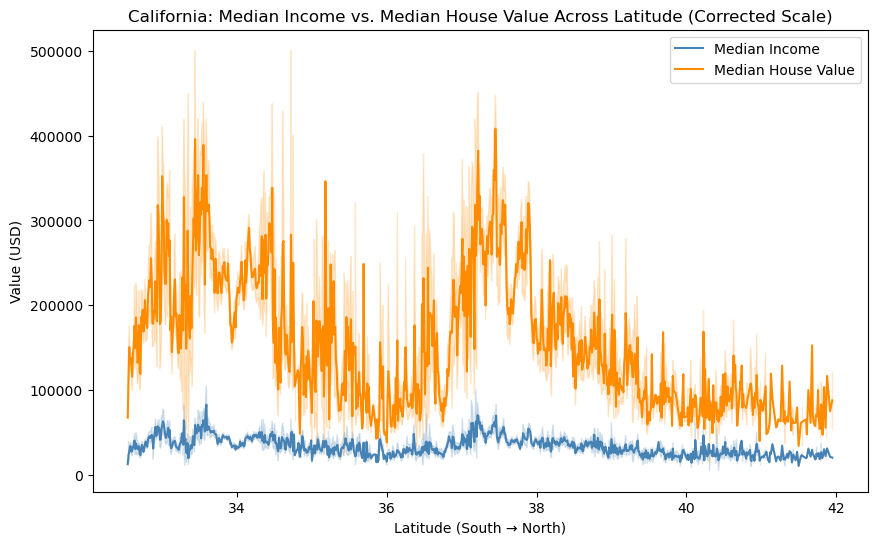

In [53]:
housing = pd.read_csv("housing_clean.csv")

# Scale median_income to represent actual yearly salaries (in dollars)
housing_fixed = housing.copy()
housing_fixed['median_income'] = housing_fixed['median_income'] * 10000  # Convert tens of thousands to actual dollars

# Sort by latitude for smooth line plot
housing_sorted = housing_fixed.sort_values(by="latitude")

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x="latitude", y="median_income", data=housing_sorted, label="Median Income", color="steelblue")
sns.lineplot(x="latitude", y="median_house_value", data=housing_sorted, label="Median House Value", color="darkorange")
plt.title("California: Median Income vs. Median House Value Across Latitude (Corrected Scale)")
plt.xlabel("Latitude (South → North)")
plt.ylabel("Value (USD)")
plt.legend()
plt.show()

##### Plot Insight

The line chart shows that while both median income and median house value vary with latitude, house values rise much more steeply in certain southern and coastal regions. Median income increases only slightly, indicating a widening affordability gap where housing prices outpace income growth across California.

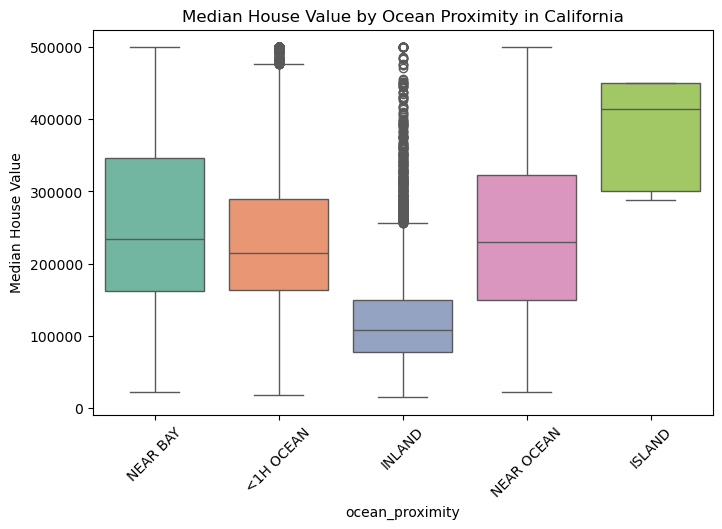

In [70]:
plt.figure(figsize=(8,5))
sns.boxplot(x="ocean_proximity", y="median_house_value", data=housing, hue = 'ocean_proximity', palette="Set2", legend = False)
plt.title("Median House Value by Ocean Proximity in California")
plt.xticks(rotation=45)
plt.ylabel("Median House Value")
plt.show()


#### Plot Insight

Properties closer to the water have substantially higher median values and wider variability. Inland areas show lower, more compact price distributions, highlighting a strong coastal premium in California housing.

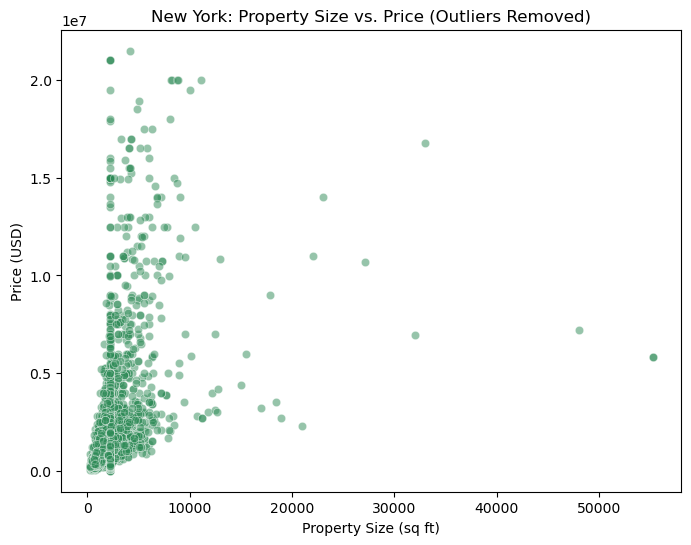

In [54]:
# Load dataset
ny_house = pd.read_csv("NY-House-Dataset.cleaned.csv")

# Remove top 1% of prices to eliminate extreme outliers
ny_no_outliers = ny_house[ny_house['price'] < ny_house['price'].quantile(0.99)]

# Plot scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="propertysqft", y="price", data=ny_no_outliers, alpha=0.5, color="seagreen")
plt.title("New York: Property Size vs. Price (Outliers Removed)")
plt.xlabel("Property Size (sq ft)")
plt.ylabel("Price (USD)")
plt.show()

##### Plot Insight

Most listings cluster under 5,000 sq ft, showing that larger homes typically cost more, but price growth slows beyond mid-range sizes. This suggests location and neighborhood effects influence prices more than just size.

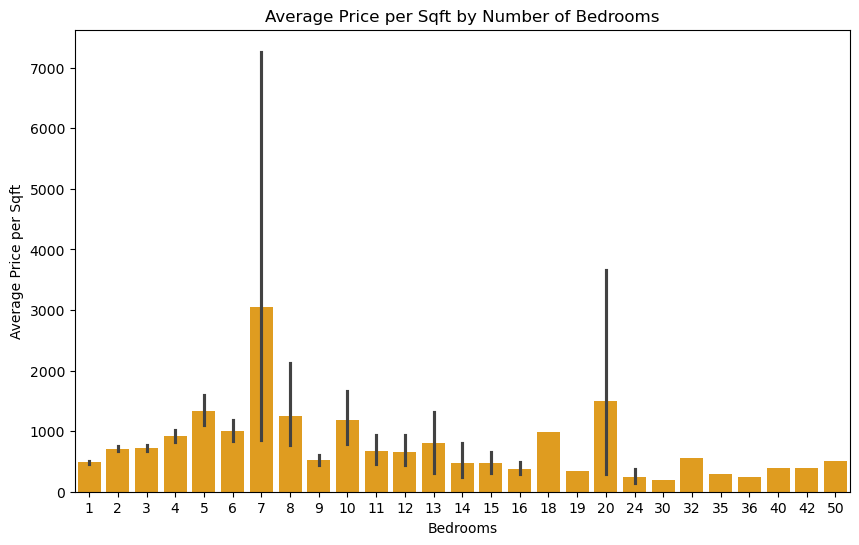

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x="beds", y="price_per_sqft", data=ny_house, color = 'orange')
plt.title("Average Price per Sqft by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price per Sqft")
plt.show()


##### Plot Insight

The average price per square foot generally decreases as the number of bedrooms increases. Smaller units with fewer bedrooms tend to be more expensive per square foot, which aligns with high-density, urban apartment trends where compact living spaces command premium rates. It is not necessary that more bedrooms means more expensive in NY

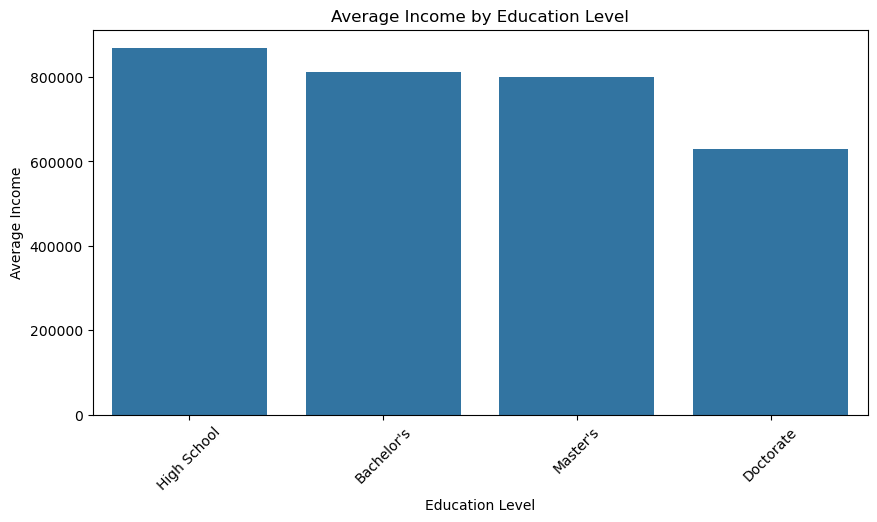

In [58]:
edu_income = regression.groupby("education_level")["income"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=edu_income.index, y=edu_income.values)
plt.title("Average Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Income")
plt.xticks(rotation=45)
plt.show()


#### Plot Insight

Counterintuitively, average income decreases with higher education in this sample (High School > Bachelor’s > Master’s > Doctorate). This likely reflects confounding factors. e.g., more work experience among non-degree earners (skilled trades), and lower current earnings for grad students/postdocs. A follow-up view by work_experience (or age/employment status) could clarify the effect of education independent of experience. Or it could be that people who didn't go to college didn't take up common ordinary professions and try businesses/ occupations that pay off the risk they take.

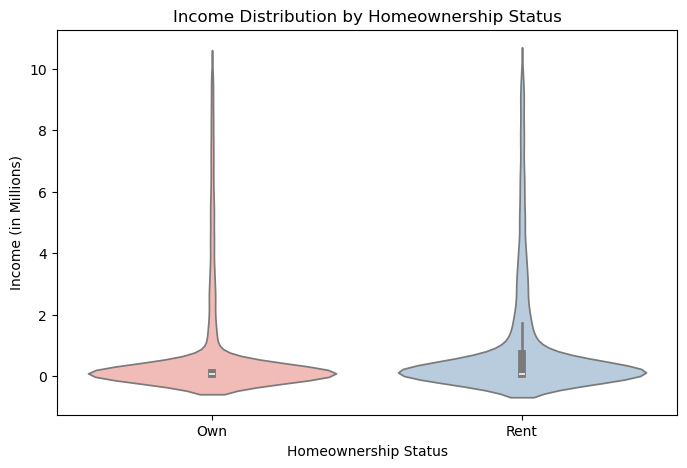

In [68]:
regression = pd.read_csv("Regression-Dataset-For-Household-Income-Analysis.cleaned.csv")

# Convert income to millions for a clearer y-axis
regression_fixed = regression.copy()
regression_fixed['income_millions'] = regression_fixed['income'] / 1_000_000

# Plot violin plot
plt.figure(figsize=(8,5))
sns.violinplot(x="homeownership_status", y="income_millions", data=regression_fixed, hue="homeownership_status", palette="Pastel1", legend = False)
plt.title("Income Distribution by Homeownership Status")
plt.xlabel("Homeownership Status")
plt.ylabel("Income (in Millions)")
plt.yticks([0, 2, 4, 6, 8, 10])
plt.show()

#### Plot Insight

Homeowners typically report higher incomes than renters, but the violin plot shows notable overlap between the two distributions. This implies that income alone doesn’t fully determine homeownership. Other factors like debt, credit, or savings likely play important roles.

### Cross-Dataset Insights and Preliminary Conclusions

After exploring the three major datasets: California Housing, New York Housing, and the Regression (Income) dataset, some consistent themes emerge.

**1. Regional Affordability Gaps**
- Housing costs in both California and New York show strong right-skewed distributions. 
- Coastal or urban proximity is a key price driver: homes near the coast in California and central locations in New York command disproportionately higher prices.
- Even after scaling income correctly, the average household income is far below the mean home value, indicating affordability pressure in both states.

**2. Socio-economic Patterns**
- In the income dataset, homeownership correlates with higher income levels, yet the overlap between renters and owners suggests income alone doesn’t fully explain ownership.
- Surprisingly, the education-to-income pattern is reversed in this sample: individuals with only a high school education earn slightly more on average than those with advanced degrees, possibly due to higher work experience or labor-market differences. Or it could be that people who didn't go to college didn't take up common, ordinary professions and instead tried businesses/occupations that pay off the risks they take.

**3. Market Behavior**
- In New York, property size and the number of rooms influence total price but not price per square foot, implying that dense urban housing markets value compact units more highly.
- In California, both income and house values increase toward specific latitudes, suggesting spatial clustering of wealth and property prices.
